# Kaggle - Competition

# Titanic: Machine Learning from Disaster

# The challenger

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import warnings

from collections import Counter


%matplotlib inline
random.seed(0)
warnings.filterwarnings('ignore')


# Import data

In [2]:
try: 
    df_train = pd.read_csv('D:\\Kaggle\\Titanic\\train.csv')
    print('File 1 loading - Success!')
    df_test = pd.read_csv('D:\\Kaggle\\Titanic\\test.csv')
    print('File 2 loading - Success!')
except:
    print('File loading - Failed!')
    

File 1 loading - Success!
File 2 loading - Success!


# Exploratory Data Analysis 

In [3]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Features

* `PassengerId`: Unique passenger identification.
* `Survived`: Whether a passenger survived or not; 1 if survived and 0 if not.
* `Pclass`: Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd.
* `Name`: Passanger name.
* `Sex`: Passanger gender. 
* `Age`: Passanger age in years.
* `SibSp`: Number of sibling/spouses aboard the Titanic.
* `Parch`: Number of children/parents aboard the Titanic.
* `Ticket`: Ticket number.
* `Fare`: Passanger fare.
* `Cabin`: Cabin number. 
* `Embarked`: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton.



In [7]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Initially, we can see that:

* `Age` feature has missing values;
* There are indications of non-normalities of some features.


In [9]:
df_train.groupby("Survived").count()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


Comments:

We have a lot of missing values in 2 features (`Age` and `Cabin`). The `Cabin` feature will be discarded due to the large number of NaNs, but its informative content can generate useful information about the respective deck. About `Age`, your NaNs will be studied in the topic "Missing Values".

The features `PassengerId` and `Name` will be discarded, because they are variables of individual identification. However, before discarding `Name` we will create a new feature based on the individual's treatment pronouns, which can be important information.

NaNs are also present in the test data, the treatment given to the training data will also be given to the test data.


## Take a look in our features

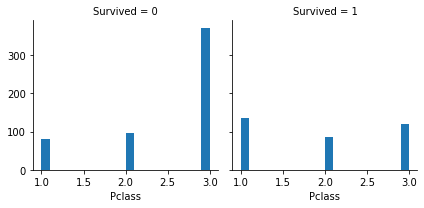

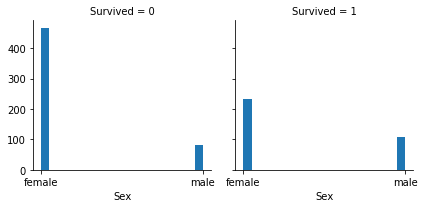

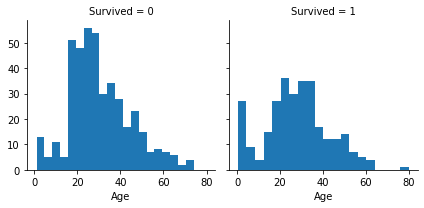

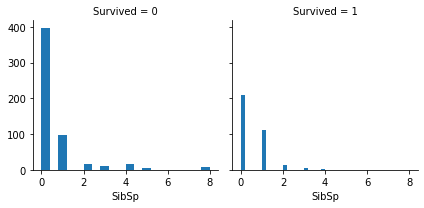

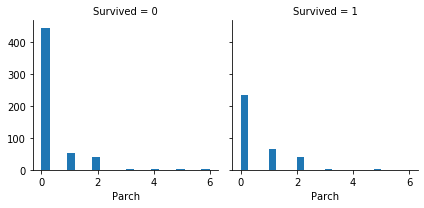

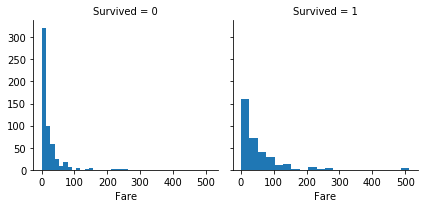

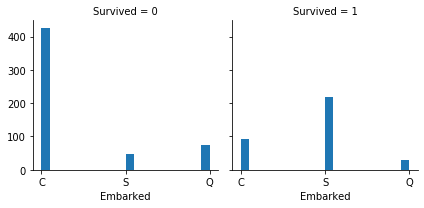

In [10]:
# histogram of the dependent variables in relation to the variable of interest.

for i in ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']: 
    plot = sns.FacetGrid(df_train, col='Survived')
    plot.map(plt.hist, i, bins=20)
    

Comments:

We can observe an imbalance of some variables, such as gender(`Sex`) which has more women than men or `Embarked` where the majority of the embarks were in Cherbourg ('C').

We can think of the first questions, such as:
   1. Does gender matter? Does being a woman increase my chances of surviving?
   2. Does ticket class matter?
   3. Does boarding Southamptom increase my chances of survival? ('Embarked' = 'S')
    
    
In the end, the goal is to know who survives and who doesn't.


# Data Preprocessing

Step by step:
    
    1. Combine Features;
    2. Missing values;
    3. Transform features;
    4. Scaling numerical data;
    5. Drop features;
    6. Dummies;
  

## Import data preprocessing functions

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## Combine Features 

Comments:

Initially, we have two features with informational content that can be combined, which are `SibSp` and `Parch`. If we combine, we can build features called '`Family_size` and `Travelled_alone`. 

* `Family_size`: is the sum of `SibSp` and `Parch` plus 1, indicating the size of the family.

* `Travelled_alone`: contains the information whether the individual travelled alone or not (given the domain of the original features).

Given the new feature `Family_size`, we can combine it with `Fare` and find out what the average fare for the individual's family group is.

* `Fare_per_family`: the average fare for the individual's family group.



### Family Size

In [12]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch'] + 1


In [13]:
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [14]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


### Fare per family

In [15]:
df_train['Fare_per_family'] = df_train['Fare'] / df_train['Family_size']
df_test['Fare_per_family'] = df_test['Fare'] / df_test['Family_size']


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Family_size        891 non-null int64
Fare_per_family    891 non-null float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


### Travelled alone    

In [17]:
# Function to create 'Travelled_alone' feature

def feature_travelled_alone(data):
    
    data['Travelled_alone'] = "" #creates an empty feature called 'Travelled_alone' in the dataset 
        
    data.loc[ (data['SibSp'] == 0) & (data['Parch'] == 0), 'Travelled_alone'] = 1 #condition to travelled alone.
    data.loc[ (data['SibSp'] != 0) | (data['Parch'] != 0), 'Travelled_alone'] = 0
    
    return data


In [18]:
df_train = feature_travelled_alone(df_train)
df_test = feature_travelled_alone(df_test)


In [19]:
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,13.00000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,30.00000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,5.86250,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,30.00000,1


In [20]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,8.050000,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,108.900000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,7.250000,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,8.050000,1


## Missing values

In [21]:
df_train.isna().sum()


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Family_size          0
Fare_per_family      0
Travelled_alone      0
dtype: int64

In [22]:
df_test.isna().sum()


PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Family_size          0
Fare_per_family      1
Travelled_alone      0
dtype: int64

Comments:

* As stated earlier, we will investigate `Age` and `Cabin` NaNs.

About `Cabin`, owning one was not for everyone, possibly individuals with NaNs just didn't have a cabin. In this way, we can create a feature containing the information whether or not it has a cabin and/or the deck's correspondence (which is information contained in the cabin identification, like 'C' or 'A').

The first question about `Age`:

* Do `Age` NaNs have a pattern or are they random?


In [23]:
#pd.set_option('display.max_rows', 200)


In [24]:
df_train[ (df_train['Age'].isnull() == True) ] #data with NaNs in 'Age', looking for some pattern.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,8.458300,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,13.000000,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,7.225000,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,7.225000,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,7.879200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1,7.229200,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,6.322727,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1,9.500000,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,7.895800,1


In [25]:
df_train[ (df_train['Age'].isnull() == True) ].describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,1.745763,15.940015,0.751412
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,2.052658,27.236320,0.433420
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,1.000000,7.229200,1.000000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.000000,7.829200,1.000000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,1.000000,9.983350,1.000000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,11.000000,227.525000,1.000000


In [26]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,35.841257,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,7.250000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.300000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,23.666667,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200,1.000000


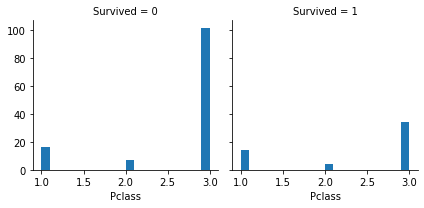

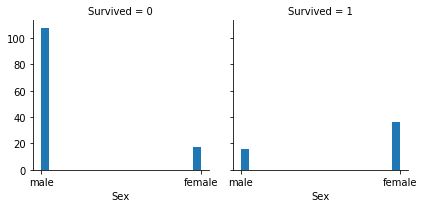

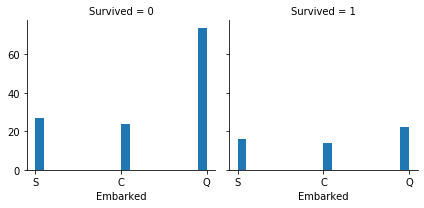

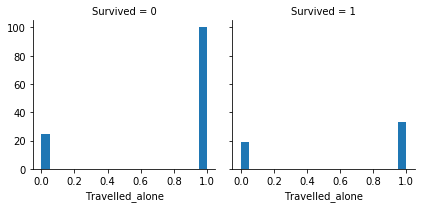

In [27]:
for i in ['Pclass','Sex','Embarked','Travelled_alone']: 
    plot = sns.FacetGrid(df_train[ (df_train['Age'].isnull() == True) ], col='Survived')
    plot.map(plt.hist, i, bins=20)
    

Comments:

Looking at the outputs above, we have indications that the `Age` NaNs are not random. Thus, the simple disposal of these lines with NaN cannot be done.

Group indication (possible): `Pclass` = 3, `Embarked` = 'Q' and `Travelled_alone` = 1.


In [28]:
df_groupy_NaN = df_train[ (df_train['Pclass'] == 3) ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,2.008147,8.094756,0.659878
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,1.953525,6.330092,0.474233
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,1.000000,6.737500,0.000000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,1.000000,7.750000,1.000000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000,2.000000,8.050000,1.000000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,11.000000,56.495800,1.000000


In [29]:
df_groupy_NaN = df_train[ (df_train['Embarked'] == 'Q') ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,77.000000,77.00000,77.000000,28.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,417.896104,0.38961,2.909091,28.089286,0.428571,0.168831,13.276030,1.597403,8.731062,0.740260
std,253.646282,0.49086,0.369274,16.915396,0.979105,0.656999,14.188047,1.310481,5.548443,0.441367
min,6.000000,0.00000,1.000000,2.000000,0.000000,0.000000,6.750000,1.000000,2.583333,0.000000
25%,209.000000,0.00000,3.000000,17.500000,0.000000,0.000000,7.750000,1.000000,7.733300,0.000000
50%,389.000000,0.00000,3.000000,27.000000,0.000000,0.000000,7.750000,1.000000,7.750000,1.000000
75%,630.000000,1.00000,3.000000,34.500000,0.000000,0.000000,15.500000,2.000000,7.750000,1.000000
max,891.000000,1.00000,3.000000,70.500000,4.000000,5.000000,90.000000,6.000000,45.000000,1.000000


In [30]:
df_groupy_NaN = df_train[ (df_train['Travelled_alone'] == 1) ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,537.000000,537.000000,537.000000,404.000000,537.0,537.0,537.000000,537.0,537.000000,537.0
mean,458.000000,0.303538,2.400372,32.220297,0.0,0.0,21.242689,1.0,21.242689,1.0
std,255.714174,0.460214,0.804511,12.899871,0.0,0.0,42.223510,0.0,42.223510,0.0
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000,1.0,0.000000,1.0
25%,235.000000,0.000000,2.000000,22.000000,0.0,0.0,7.775000,1.0,7.775000,1.0
50%,466.000000,0.000000,3.000000,29.500000,0.0,0.0,8.137500,1.0,8.137500,1.0
75%,681.000000,1.000000,3.000000,39.000000,0.0,0.0,15.000000,1.0,15.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200,1.0,512.329200,1.0


In [31]:
df_groupy_NaN = df_train[ (df_train['Pclass'] == 3) ]
df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Travelled_alone'] == 1) ]
#df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Embarked'] == 'Q') ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,324.000000,324.000000,324.0,225.000000,324.0,324.0,324.000000,324.0,324.000000,324.0
mean,459.435185,0.212963,3.0,28.235556,0.0,0.0,9.272052,1.0,9.272052,1.0
std,260.585692,0.410035,0.0,10.788659,0.0,0.0,7.420820,0.0,7.420820,0.0
min,3.000000,0.000000,3.0,5.000000,0.0,0.0,0.000000,1.0,0.000000,1.0
25%,225.500000,0.000000,3.0,21.000000,0.0,0.0,7.732275,1.0,7.732275,1.0
50%,473.500000,0.000000,3.0,26.000000,0.0,0.0,7.895800,1.0,7.895800,1.0
75%,684.250000,0.000000,3.0,32.000000,0.0,0.0,8.050000,1.0,8.050000,1.0
max,891.000000,1.000000,3.0,74.000000,0.0,0.0,56.495800,1.0,56.495800,1.0


In [32]:
df_groupy_NaN = df_train[ (df_train['Pclass'] == 3) ]
#df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Travelled_alone'] == 1) ]
df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Embarked'] == 'Q') ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,72.000000,72.00000,72.0,24.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,420.347222,0.37500,3.0,25.937500,0.416667,0.180556,11.183393,1.597222,7.781136,0.750000
std,259.844545,0.48752,0.0,16.807938,0.989380,0.678158,6.721677,1.339116,2.566340,0.436051
min,6.000000,0.00000,3.0,2.000000,0.000000,0.000000,6.750000,1.000000,2.583333,0.000000
25%,198.500000,0.00000,3.0,16.000000,0.000000,0.000000,7.750000,1.000000,7.733300,0.750000
50%,400.500000,0.00000,3.0,21.500000,0.000000,0.000000,7.750000,1.000000,7.750000,1.000000
75%,654.250000,1.00000,3.0,32.000000,0.000000,0.000000,10.218725,1.250000,7.750000,1.000000
max,891.000000,1.00000,3.0,70.500000,4.000000,5.000000,29.125000,6.000000,24.150000,1.000000


In [33]:
df_groupy_NaN = df_train[ (df_train['Pclass'] == 3) ]
df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Travelled_alone'] == 1) ]
df_groupy_NaN = df_groupy_NaN[ (df_groupy_NaN['Embarked'] == 'Q') ]
df_groupy_NaN.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,54.000000,54.000000,54.0,17.000000,54.0,54.0,54.000000,54.0,54.000000,54.0
mean,435.203704,0.388889,3.0,28.852941,0.0,0.0,8.162580,1.0,8.162580,1.0
std,256.889476,0.492076,0.0,16.227643,0.0,0.0,2.472846,0.0,2.472846,0.0
min,6.000000,0.000000,3.0,15.000000,0.0,0.0,6.750000,1.0,6.750000,1.0
25%,222.000000,0.000000,3.0,19.000000,0.0,0.0,7.743775,1.0,7.743775,1.0
50%,444.500000,0.000000,3.0,22.000000,0.0,0.0,7.750000,1.0,7.750000,1.0
75%,654.750000,1.000000,3.0,31.000000,0.0,0.0,7.750000,1.0,7.750000,1.0
max,891.000000,1.000000,3.0,70.500000,0.0,0.0,24.150000,1.0,24.150000,1.0


Comments:

This specific group (using the 3 equalities) corresponds to 20% of the total `Age` NaNs in training data.

Filtering by `Pclass` and `Travelled_alone` we have 56% of the total `Age` NaNs in training data. This will be our specific group.

The treatment of NaNs will be done based on the group for those who belong to the identified group. The others will be treated considering the complete sample.


In [34]:
# Function to imput data in 'Age' considering specific group 


# We will imput random values based on the mean and standard deviation of the data (total or group)



def imput_data_by_group(data_1, data_2):
    
    data = data_1.append(data_2, sort = False) #merge training and test data
    
    data_group = data[ (data['Pclass'] == 3) ] #first group filter
    data_group = data_group[ (data_group['Travelled_alone'] == 1) ] #second group filter
    
    mean_base = data['Age'].mean() #average of full data 
    std_base = data['Age'].std() #standard desviation of full data
    
    mean_group = data_group['Age'].mean() #average of group on full data
    std_group = data_group['Age'].std() #standard desviation of group on full data
    
    
    for i in range(len(data_1)): #treating NaNs from training data 
        if (pd.isnull(data_1.loc[i,'Age']) == True):
            if (data_1.loc[i,"Pclass"] == 3) and (data_1.loc[i,"Travelled_alone"] == 1): #condition to be part of the group
                data_1.loc[i,'Age'] = np.random.randint(mean_group - std_group, mean_group + std_group, 1) 
                #imputing random value
            else:
                data_1.loc[i,'Age'] = np.random.randint(mean_base - std_base, mean_base + std_base, 1)
                #imputing random value
                
    for i in range(len(data_2)): #treating NaNs from test data 
        if (pd.isnull(data_2.loc[i,'Age']) == True):
            if (data_2.loc[i,"Pclass"] == 3) and (data_2.loc[i,"Travelled_alone"] == 1): #condition to be part of the group
                data_2.loc[i,'Age'] = np.random.randint(mean_group - std_group, mean_group + std_group, 1)
                #imputing random value
            else:
                data_2.loc[i,'Age'] = np.random.randint(mean_base - std_base, mean_base + std_base, 1)
                #imputing random value
    
    return (data_1, data_2)
        

In [35]:
random.seed(0)


df_train, df_test = imput_data_by_group(df_train, df_test)


In [36]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.212312,0.523008,0.381594,32.204208,1.904602,19.916375,0.602694
std,257.353842,0.486592,0.836071,13.451847,1.102743,0.806057,49.693429,1.613459,35.841257,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400,1.000000,7.250000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.300000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000,23.666667,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200,1.000000


In [37]:
df_test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.953349,0.447368,0.392344,35.627188,1.839713,21.804161,0.605263
std,120.810458,0.841838,13.034733,0.896760,0.981429,55.907576,1.519072,35.639766,0.489380
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800,1.000000,7.629200,0.000000
50%,1100.500000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.662500,1.000000
75%,1204.750000,3.000000,37.000000,1.000000,0.000000,31.500000,2.000000,26.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,11.000000,262.375000,1.000000


In [38]:
df_train.isna().sum()


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Family_size          0
Fare_per_family      0
Travelled_alone      0
dtype: int64

In [39]:
df_test.isna().sum()


PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Family_size          0
Fare_per_family      1
Travelled_alone      0
dtype: int64

In [40]:
df_train = df_train[ df_train['Embarked'].isnull() == False]


Comments:

As we cannot rule out any observation from the test base, we will imput based on the average and standard deviation, in the same way as we did for 'Age'.


In [41]:
# Function to imput data in 'Fare' and 'Fare_per_family'


def imput_data_fare(data_1, data_2, columns):
    
    data = data_1.append(data_2, sort = False) #merge training and test data
    
    mean_base = data[columns].mean() #average of full data 
    std_base = data[columns].std() #standard desviation of full data
                
    for i in range(len(data_2)): #treating NaNs from test data 
        if (pd.isnull(data_2.loc[i,columns]) == True):
                data_2.loc[i,columns] = np.random.randint(mean_base - std_base, mean_base + std_base, 1) #imputing random value
    
    return (data_2)



In [42]:
random.seed(0)

df_test = imput_data_fare(df_train, df_test,'Fare')
df_test = imput_data_fare(df_train, df_test,'Fare_per_family')


## Transform features


`Age` - We can transform the numeric variable `Age` into a new categorical feature (`Age_group`), depending on age groups. Being, respectively: child; teen; young adult; adult; senior; and, retired.

`Fare` - We can transform the numeric variable `Fare` into a new categorical feature (`Fare_group`), depending on fare groups. Being, respectively: very low; low; base; high; and,  very high.

`Name` - We can extract the pronoun from the individual's treatment by removing this information from the `Name` resource and creating a new categorical resource called `Title`.

`Cabin` - As stated earlier, we are going to create a new feature called `Deck` based on the information contained in the `Cabin` feature. For individuals without this information, we will assign the string 'U' in reference to 'Unknown'.

`Pclass` - We will change the type of the feature value to string, to facilitate the process of making it a dummy.


### Age group

In [43]:
# Function to create a feature 'Age_group' (categorial feature) 


def convert_age_to_group(data):
    
    data['Age_group'] = ''
    
    data.loc[ data['Age'] <= 12, 'Age_group'] = 'child'
    data.loc[(data['Age'] > 12) & (data['Age'] <= 18), 'Age_group'] = 'teen'
    data.loc[(data['Age'] > 18) & (data['Age'] <= 27), 'Age_group'] = 'young_adult'
    data.loc[(data['Age'] > 27) & (data['Age'] <= 40), 'Age_group'] = 'adult'
    data.loc[(data['Age'] > 40) & (data['Age'] <= 59), 'Age_group'] = 'senior'
    data.loc[(data['Age'] > 59), 'Age_group'] = 'retired'

    return data


In [44]:
df_train = convert_age_to_group(df_train)
df_test = convert_age_to_group(df_test)


In [45]:
df_train['Age_group'].value_counts()


adult          298
young_adult    269
senior         134
teen            94
child           69
retired         25
Name: Age_group, dtype: int64

### Fare Group

In [46]:
# Function to create a feature 'Fare_rate' (categorial feature) 

def convert_fare_to_group(data):
    
    data['Fare_rate'] = ''
    
    data.loc[ data['Fare'] <= 8, 'Fare_rate'] = 'very_low'
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 16), 'Fare_rate'] = 'low'
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 32), 'Fare_rate'] = 'base'
    data.loc[(data['Fare'] > 32) & (data['Fare'] <= 64), 'Fare_rate'] = 'high'
    data.loc[(data['Fare'] > 64), 'Fare_rate'] = 'very_high'

    return data


In [47]:
df_train = convert_fare_to_group(df_train)
df_test = convert_fare_to_group(df_test)


In [48]:
df_train['Fare_rate'].value_counts()


very_low     241
base         222
low          217
very_high    116
high          93
Name: Fare_rate, dtype: int64

# Title

In [49]:
# Function to create a feature 'Title' (categorial feature) 


def convert_title_to_group(data):
    
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    data.loc[ (data['Title'] == 'Ms'), 'Title'] = 'Miss'
    data.loc[ (data['Title'] == 'Mlle'), 'Title'] = 'Miss' 
    data.loc[ (data['Title'] == 'Mme'), 'Title'] = 'Mrs'
    
    data.loc[ (data['Title'] != 'Mr') & (data['Title'] != 'Mrs') & (data['Title'] != 'Miss') & (data['Title'] != 'Master'), 'Title'] = 'Distinct'           

    return data


In [50]:
df_train = convert_title_to_group(df_train)
df_test = convert_title_to_group(df_test)


### Pclass to categorical data

In [51]:
df_train['Pclass'] = df_train['Pclass'].astype(str)


In [52]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Pclass             889 non-null object
Name               889 non-null object
Sex                889 non-null object
Age                889 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
Ticket             889 non-null object
Fare               889 non-null float64
Cabin              202 non-null object
Embarked           889 non-null object
Family_size        889 non-null int64
Fare_per_family    889 non-null float64
Travelled_alone    889 non-null int64
Age_group          889 non-null object
Fare_rate          889 non-null object
Title              889 non-null object
dtypes: float64(3), int64(6), object(9)
memory usage: 132.0+ KB


In [53]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone,Age_group,Fare_rate,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,0,young_adult,very_low,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,0,adult,very_high,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,1,young_adult,very_low,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,0,adult,high,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,1,adult,low,Mr


In [54]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone,Age_group,Fare_rate,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200,1,adult,very_low,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000,0,senior,very_low,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500,1,retired,low,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500,1,young_adult,low,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833,0,young_adult,low,Mrs


### Deck

In [55]:
# Function to create a feature 'Deck' (categorial feature) 

def convert_cabin_to_deck(data):
    
    data['Deck'] = data['Cabin'].fillna('U0')
    data['Deck'] = [x[0] for x in data['Deck'].values]

    return data


In [56]:
df_train = convert_cabin_to_deck(df_train)
df_test = convert_cabin_to_deck(df_test)


In [57]:
df_train['Deck'].value_counts()


U    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

Comments:

Because of the low variability of the data, we will not use the features of deck A, F, G and T after creating your dummies.



In [58]:
# Function to transform 'Cabin' into new  feature

def convert_cabin_to_havecabin(data):
    
    data['Have_cabin'] = ''
    
    data.loc[(data['Cabin'].isna() == False ), 'Have_cabin'] = 1 #it is a dummy features, 1 have and 0 don't have cabin
    data.loc[(data['Cabin'].isna() == True ), 'Have_cabin'] =  0

    return data




In [59]:
df_train = convert_cabin_to_havecabin(df_train)
df_test = convert_cabin_to_havecabin(df_test)


In [60]:
df_train.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone,Age_group,Fare_rate,Title,Deck,Have_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,0,young_adult,very_low,Mr,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,0,adult,very_high,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,1,young_adult,very_low,Miss,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,0,adult,high,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,1,adult,low,Mr,U,0


In [61]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Fare_per_family,Travelled_alone,Age_group,Fare_rate,Title,Deck,Have_cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.829200,1,adult,very_low,Mr,U,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.500000,0,senior,very_low,Mrs,U,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.687500,1,retired,low,Mr,U,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.662500,1,young_adult,low,Mr,U,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,4.095833,0,young_adult,low,Mrs,U,0


## Drop features

Comments:

Discarding the features previously indicated.


In [62]:
df_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Fare_per_family', 'Travelled_alone', 'Age_group', 'Fare_rate', 'Title',
       'Deck', 'Have_cabin'],
      dtype='object')

In [63]:
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


## Scaling numerical variables

Comments:
    
As I will use dummy variables (0 or 1), I chose to use the MinMax function, returning the numerical values on the scale between 0 and 1. This procedure is more compatible than the standard scale.


In [64]:
num_features = list(df_train.select_dtypes(include=['int64', 'float64', 'int32']).columns)[1:-2] #

#ss_scaler = StandardScaler()

ss_scaler = MinMaxScaler()

df_train = pd.DataFrame(data = df_train)
df_train[num_features] = ss_scaler.fit_transform(df_train[num_features])

df_test = pd.DataFrame(data = df_test)
df_test[num_features] = ss_scaler.fit_transform(df_test[num_features])



In [65]:
num_features


['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Fare_per_family']

## Dummies

Comments:

Remember the dummy variable rule (n - 1). We will adapt to this rule later on, at the moment we will keep all the dummy features created.


In [66]:
cat_features = list(df_train.select_dtypes(include=['object']).columns) #categorical features to change into dummies


#transforming categorical data into dummy features

for i in cat_features: #for training data
    df_train = pd.concat([df_train, pd.get_dummies(df_train[i], prefix=i)], axis=1)
    df_train.drop(i, axis = 1, inplace=True)
    
    
for i in cat_features: #for test data
    df_test = pd.concat([df_test, pd.get_dummies(df_test[i], prefix=i)], axis=1)
    df_test.drop(i, axis = 1, inplace=True)
    


In [67]:
cat_features


['Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_rate', 'Title', 'Deck']

In [68]:
df_test.columns


Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Family_size', 'Fare_per_family', 'Travelled_alone',
       'Have_cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_group_adult',
       'Age_group_child', 'Age_group_retired', 'Age_group_senior',
       'Age_group_teen', 'Age_group_young_adult', 'Fare_rate_base',
       'Fare_rate_high', 'Fare_rate_low', 'Fare_rate_very_high',
       'Fare_rate_very_low', 'Title_Distinct', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U'],
      dtype='object')

## Features

In [69]:
df_train.head()


,Survived,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone,Have_cabin,Pclass_1,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,0.271174,0.125,0.0,0.014151,0.1,0.007076,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.472229,0.125,0.0,0.139136,0.1,0.069568,0,1,1,...,1,0,0,1,0,0,0,0,0,0
2,1,0.321438,0.000,0.0,0.015469,0.0,0.015469,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.125,0.0,0.103644,0.1,0.051822,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0.434531,0.000,0.0,0.015713,0.0,0.015713,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df_test.isna().sum()

PassengerId                0
Name                       0
Age                        0
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Cabin                    327
Family_size                0
Fare_per_family            0
Travelled_alone            0
Have_cabin                 0
Pclass_1                   0
Pclass_2                   0
Pclass_3                   0
Sex_female                 0
Sex_male                   0
Embarked_C                 0
Embarked_Q                 0
Embarked_S                 0
Age_group_adult            0
Age_group_child            0
Age_group_retired          0
Age_group_senior           0
Age_group_teen             0
Age_group_young_adult      0
Fare_rate_base             0
Fare_rate_high             0
Fare_rate_low              0
Fare_rate_very_high        0
Fare_rate_very_low         0
Title_Distinct             0
Title_Master               0
Title_Miss                 0
Title_Mr      

## Data snapshot after pre-procesing

In [71]:
df_train


,Survived,Age,SibSp,Parch,Fare,Family_size,Fare_per_family,Travelled_alone,Have_cabin,Pclass_1,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,0.271174,0.125,0.000000,0.014151,0.1,0.007076,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.472229,0.125,0.000000,0.139136,0.1,0.069568,0,1,1,...,1,0,0,1,0,0,0,0,0,0
2,1,0.321438,0.000,0.000000,0.015469,0.0,0.015469,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.125,0.000000,0.103644,0.1,0.051822,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0.434531,0.000,0.000000,0.015713,0.0,0.015713,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.025374,0.0,0.025374,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,0.233476,0.000,0.000000,0.058556,0.0,0.058556,1,1,1,...,0,0,1,0,0,0,0,0,0,0
888,0,0.220910,0.125,0.333333,0.045771,0.3,0.011443,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.000,0.000000,0.058556,0.0,0.058556,1,1,1,...,0,0,0,1,0,0,0,0,0,0


# Correlogram

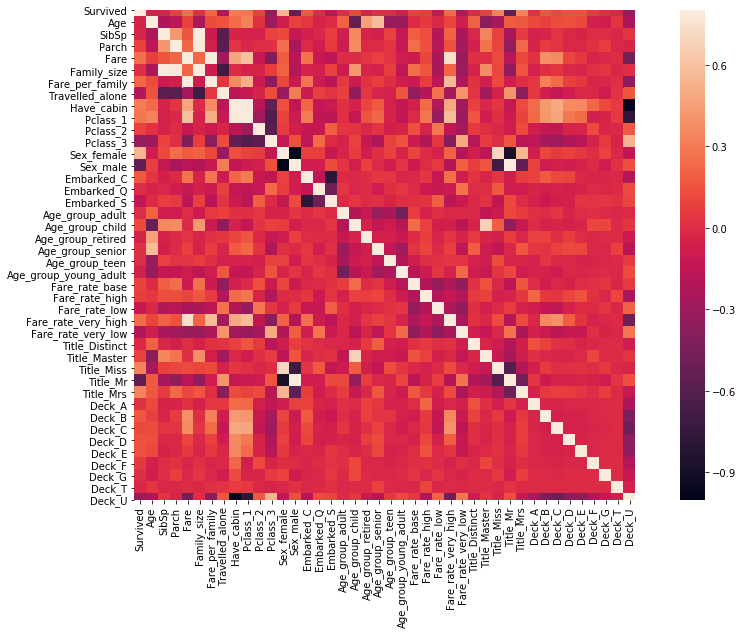

In [72]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


Comments:

We can observe a moderate correlation between `Suviver` and `Sex_female`, it is a good insight into who may have survived. The expected correlations for the other features were observed.


In [73]:
df_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size',
       'Fare_per_family', 'Travelled_alone', 'Have_cabin', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age_group_adult', 'Age_group_child',
       'Age_group_retired', 'Age_group_senior', 'Age_group_teen',
       'Age_group_young_adult', 'Fare_rate_base', 'Fare_rate_high',
       'Fare_rate_low', 'Fare_rate_very_high', 'Fare_rate_very_low',
       'Title_Distinct', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_U'],
      dtype='object')

In [74]:
# Adapting the features given the dummy rule, collinearity problems between features and data variability.

# withdrawn because of:

# data collinearity: 'SibSp' related to 'Parch' and 'Family_size'; 'Have_cabin' related to deck features; and, 'Age related to 
#     'Age_group_' features.
    
# data variability and/or dummy rule: 'Pclass_3'; 'Embarked_S'; 'Age_group_retired'; 'Fare_rate_very_low';'Title_Distinct';
#     'Deck_A','Deck_F'; 'Deck_G'; and, 'Deck_T'.                                



features = ['Survived', 'Parch', 'Fare','Family_size', 'Travelled_alone', 'Fare_per_family', 'Pclass_1', 'Pclass_2', 
            'Sex_female', 'Embarked_C', 'Embarked_Q', 'Age_group_child', 'Age_group_teen', 'Age_group_adult', 'Age_group_young_adult', 
            'Age_group_senior', 'Fare_rate_very_high','Fare_rate_high', 'Fare_rate_base','Fare_rate_low', 'Title_Master', 'Title_Miss',
            'Title_Mr', 'Title_Mrs','Deck_B','Deck_C','Deck_D','Deck_E','Deck_U']





# Methods and Metrics

## Methods

Which method to use?

Basically, we will use here all the classification methods available in the sklearn library that are compatible with crossvalidation and my data (Ex: the Gaussian Naive Bayes is for categorical data, and we also have numerical variables). Which, by their groups, are:


* Discriminant Analysis:
    1. Linear Discriminant Analysis;
    2. Quadratic Discriminant Analysis.


* Ensemble:
    1. Adaptive Boost Classifier;
    2. Bagging Classifier;
    3. Extra Trees Classifier;
    4. Gradient Boosting Classifier;
    5. Ramdom Forest Classifier.


* Gaussian Processes:
    1. Gausian Processes Classifier.


* GLM:
    1. Logistic;
    2. Passive Agressive Classifier;
    3. Perceptron;
    4. Ridge Classifier;
    5. SGD Classifier.


* Naive Bayes:
    1. Bernoulli Naive Bayes. 


* Nearest Neighbors:
    1. K Neighbors Classifier.
    

* SVM:
    1. SVC;
    2. Nu-SVC;
    3. Linear SVC.


* Decision Trees:
    1. Decision Tree Classifier;
    2. Extra Tree Classifier.

See: https://scikit-learn.org/stable/modules/classes.html# 


Additionally, we will also use the XGBoost method
   
   * Extreme Gradiente Boost. 

See: https://xgboost.readthedocs.io/en/latest/tutorials/model.html



Why use all of these classification methods?

Because the purpose of the challenge and the nature of the data allow me to do that.


Regarding the first statement, the challenge is whether those who survived or not survived, without going through an analysis within the sample or its dependent variables. If we needed to investigate the effects and significance of these input features, we would be restricted to parametric methods, with most of the methods used later being non-parametric. 

About the second statement, as noted in the correlogram earlier, if we obey the rule of dummies and avoid using the variables with high collineraryity, we will not have a restriction of methods.



## Metrics
    
Models without cross-validation will have accuracy and confusion matrix metrics.


Models with cross-validation will have mean accuracy.


## Cross-validation


We will use cross-validation too, because of its high adherence to our data type, which is a cross section data, and it can provides greater robustness in our results.


See: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit    



## Import metrics functions

In [75]:
from sklearn import metrics


## Import methods

In [76]:
from sklearn import svm, tree, neighbors, naive_bayes, ensemble, linear_model, discriminant_analysis, gaussian_process
from sklearn import model_selection
from xgboost import XGBClassifier


# Model Selection

The selected model will be based on the best average accuracy observed.


## X and Y

In [77]:
#data with selected features

X = df_train[features[1:]]
Y = df_train[features[0]]


X_validation = df_test[features[1:]]


## Methods without crossvalidation - Base line

In [78]:
random.seed(0)


methods = [
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(), 
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis
    
    #xgboost
    XGBClassifier()    
    #https://xgboost.readthedocs.io/en/latest/tutorials/index.html
    
]



#split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state = 0)



#table to compare parameters and metrics
methods_columns = ['Method','Test_Accuracy','True_Positive','True_Negative','False_Positive','False_Negative','Parameters']
methods_compare = pd.DataFrame(columns = methods_columns)


#table with predictions
method_predict = pd.DataFrame(df_test['PassengerId'])


row_index = 0

for method in methods:

    #set name and parameters
    method_name = method.__class__.__name__
    methods_compare.loc[row_index, 'Method'] = method_name
    methods_compare.loc[row_index, 'Parameters'] = str(method.get_params())
    
    #fit and predict
    method.fit(X_train, Y_train)
    predict = method.predict(X_test)
    
    #metrics
    accuracy_score = metrics.accuracy_score(Y_test, predict)
    confusion_matrix = metrics.confusion_matrix(Y_test, predict)
    
    methods_compare.loc[row_index, 'Test_Accuracy'] = accuracy_score
    methods_compare.loc[row_index, 'True_Positive'] = confusion_matrix[0][0]
    methods_compare.loc[row_index, 'True_Negative'] = confusion_matrix[1][1]
    methods_compare.loc[row_index, 'False_Positive'] = confusion_matrix[1][0]
    methods_compare.loc[row_index, 'False_Negative'] = confusion_matrix[0][1]
    
    method_predict[method_name] = method.predict(X_validation)  #predict and save
    
    row_index += 1
    

    
    

In [79]:
methods_compare.sort_values(by = ['Test_Accuracy'], ascending = False, inplace = True)
methods_compare


,Method,Test_Accuracy,True_Positive,True_Negative,False_Positive,False_Negative,Parameters
3,GradientBoostingClassifier,0.835206,136,87,23,21,"{'criterion': 'friedman_mse', 'init': None, 'l..."
1,BaggingClassifier,0.831461,136,86,24,21,"{'base_estimator': None, 'bootstrap': True, 'b..."
4,RandomForestClassifier,0.816479,137,81,29,20,"{'bootstrap': True, 'class_weight': None, 'cri..."
5,GaussianProcessClassifier,0.812734,136,81,29,21,"{'copy_X_train': True, 'kernel': None, 'max_it..."
6,LogisticRegression,0.812734,132,85,25,25,"{'C': 1.0, 'class_weight': None, 'dual': False..."
16,DecisionTreeClassifier,0.805243,134,81,29,23,"{'class_weight': None, 'criterion': 'gini', 'm..."
8,RidgeClassifier,0.805243,132,83,27,25,"{'alpha': 1.0, 'class_weight': None, 'copy_X':..."
15,LinearSVC,0.805243,132,83,27,25,"{'C': 1.0, 'class_weight': None, 'dual': True,..."
18,LinearDiscriminantAnalysis,0.801498,131,83,27,26,"{'n_components': None, 'priors': None, 'shrink..."
0,AdaBoostClassifier,0.797753,127,86,24,30,"{'algorithm': 'SAMME.R', 'base_estimator': Non..."


In [80]:
methods_compare.to_csv('methods_compare.csv', index = False, encoding='utf-8') #save methods_compare results      
method_predict.to_csv('method_predict.csv', index = False, encoding='utf-8') #save method_predict results   


## Methods with crossvalidation

In [81]:
random.seed(0)


methods = [
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(), 
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis
    
    #xgboost
    XGBClassifier()    
    #https://xgboost.readthedocs.io/en/latest/tutorials/index.html
    
]



#split dataset in cross-validation with this splitter class

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0) 


#table to compare parameters and metrics
methods_columns = ['Method','Test_Accuracy_Mean','Test_Accuracy_Std','Time_Mean','Parameters']
methods_compare = pd.DataFrame(columns = methods_columns)


#table with predictions
method_predict = pd.DataFrame(df_test['PassengerId'])

#X_train and Y_train
X_train = X
Y_train = Y

row_index = 0

for method in methods:

    #set name and parameters
    method_name = method.__class__.__name__
    methods_compare.loc[row_index, 'Method'] = method_name
    methods_compare.loc[row_index, 'Parameters'] = str(method.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(method, X_train, Y_train, cv  = cv_split)

    methods_compare.loc[row_index, 'Time_Mean'] = cv_results['fit_time'].mean() #average time
    methods_compare.loc[row_index, 'Test_Accuracy_Mean'] = cv_results['test_score'].mean() #average score
    methods_compare.loc[row_index, 'Test_Accuracy_Std'] = cv_results['test_score'].std()  #standard desviation score

    method.fit(X_train, Y_train) #model fit with test data
    method_predict[method_name] = method.predict(X_validation) #predict and save
    
    row_index += 1
    

In [82]:
methods_compare.sort_values(by = ['Test_Accuracy_Mean'], ascending = False, inplace = True)
methods_compare


,Method,Test_Accuracy_Mean,Test_Accuracy_Std,Time_Mean,Parameters
6,LogisticRegressionCV,0.820974,0.0184853,0.241357,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',..."
15,LinearSVC,0.820599,0.0188349,0.00658031,"{'C': 1.0, 'class_weight': None, 'dual': True,..."
8,RidgeClassifierCV,0.819101,0.0181985,0.00368683,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w..."
5,GaussianProcessClassifier,0.818727,0.0326595,0.170143,"{'copy_X_train': True, 'kernel': None, 'max_it..."
18,LinearDiscriminantAnalysis,0.817978,0.0191121,0.00398965,"{'n_components': None, 'priors': None, 'shrink..."
3,GradientBoostingClassifier,0.814232,0.0191121,0.0777952,"{'criterion': 'friedman_mse', 'init': None, 'l..."
0,AdaBoostClassifier,0.805243,0.0200296,0.0499677,"{'algorithm': 'SAMME.R', 'base_estimator': Non..."
20,XGBClassifier,0.805243,0.0236282,0.170106,"{'objective': 'binary:logistic', 'base_score':..."
2,ExtraTreesClassifier,0.799251,0.0279372,0.0101729,"{'bootstrap': False, 'class_weight': None, 'cr..."
16,DecisionTreeClassifier,0.795131,0.0240431,0.00298834,"{'class_weight': None, 'criterion': 'gini', 'm..."


In [83]:
methods_compare.to_csv('methods_compare_cv.csv', index = False, encoding='utf-8') #save methods_compare results      
method_predict.to_csv('method_predict_cv.csv', index = False, encoding='utf-8') #save method_predict results   


## Initial Results

The initial results were good, considering that the default hyperparameters of the methods were used. This is in the sense that a score greater than 0.80 is part of the 95th percentile of the participants in this competition in Kaggle.

However, one thing is the results in relation to the test data, another thing is in relation to the validation data.



# Can we improve performance?

We can use 2 approaches to try to improve the performance of the models, which are the 'feature selection' and the 'tuning parameters'.

The 'tuning parameters' is to select the arguments of the respective ones, selecting the group of arguments that obtained the best results based on a specific metric.
  

Here we will only use 'tunning parameters' to try to improve performance.

# Hyperparameter Tune 

We will use GridSearchCV to find the best hyperparameters, given the set of possibilities passed for each method.


See: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [84]:
vote = [
    
    #Ensemble Methods:
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    
    #Gaussian Processes:
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    
    #GLM: 
    #('lr', linear_model.LogisticRegressionCV()),
    #('rc', linear_model.RidgeClassifierCV()),
    
    #Navies Bayes: 
    ('bnb', naive_bayes.BernoulliNB()),

    
    #Nearest Neighbor: 
    ('knn', neighbors.KNeighborsClassifier()),
    
    
    #SVM: 
    ('lsvc', svm.LinearSVC()),
    ('svc', svm.SVC(probability=True)),
    
    
    #Discriminant Analysis
    ('lda', discriminant_analysis.LinearDiscriminantAnalysis()),
    
    
    #xgboost:
    ('xgb', XGBClassifier())

    
]



In [85]:
#Grid hyperparameter

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
    
    
            [{
            #AdaBoostClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            }],
       
    
            [{
            #BaggingClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'bootstrap' : grid_bool, #default=True
            'random_state': grid_seed
            #'bootstrap_features' : boolean, optional (default=False)
            #'oob_score' : bool, optional (default=False)
            #'n_jobs' : int or None, optional (default=None)
             }],

    
            [{
            #ExtraTreesClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'bootstrap': grid_bool, #default=False
            'random_state': grid_seed
            }],


            [{
            #GradientBoostingClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': grid_learn, #default=0.1 
            'n_estimators': grid_n_estimator, #default=100 
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            #'subsample' : , float, optional (default=1.0)    
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
            }],

    
            [{
            #RandomForestClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            #'bootstrap': grid_bool, #default=True
            'oob_score': [True,False], #default=False 
            'random_state': grid_seed
             }],
    
            
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
    

            [{
            #BernoulliNB
            #http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
            
    
            [{
            #KNeighborsClassifier
            #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7,8,9,10], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
    
    
             [{
            #LinearSVC
            #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
            #'lossstr' : [‘hinge’,‘squared_hinge’] (default=’squared_hinge’)
            'fit_intercept' : grid_bool, #default=True   
            'random_state': grid_seed
             }],
    
    
            [{
            #SVC
            #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #default: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],
    
    
            [{
            #DiscriminantAnalysis
            #https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis
            'solver' : ['svd','lsqr','eigen'],  #default: svd
            #'shrinkage' : ['auto', None], #default: none
             }],

    
            [{
            #XGBClassifier
            #http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
    
    
        ]



In [86]:
#Hyperparameter Tune 


random.seed(0)


start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote, grid_param): #https://docs.python.org/3/library/functions.html#zip
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X_train, Y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 
    print()
    print()
    print('-'*125)
    print()


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
print()
print('-'*125)
print('-'*125)
print('-'*125)



The best parameter for AdaBoostClassifier is {'learning_rate': 0.03, 'n_estimators': 300, 'random_state': 0} with a runtime of 25.52 seconds.


-----------------------------------------------------------------------------------------------------------------------------

The best parameter for BaggingClassifier is {'bootstrap': False, 'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 62.05 seconds.


-----------------------------------------------------------------------------------------------------------------------------

The best parameter for ExtraTreesClassifier is {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300, 'random_state': 0} with a runtime of 81.53 seconds.


-----------------------------------------------------------------------------------------------------------------------------

The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 50,

In [87]:
random.seed(0)


methods_otim = [
    
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(n_estimators = 300, learning_rate = .03, random_state = 0),
    
    ensemble.BaggingClassifier(n_estimators = 300, bootstrap = False, max_samples = .25, random_state = 0),
    
    ensemble.ExtraTreesClassifier(n_estimators = 300, bootstrap = True, criterion = 'entropy', max_depth = 8, random_state = 0),
    
    ensemble.GradientBoostingClassifier(n_estimators = 50, loss = 'deviance', learning_rate = 0.05, max_depth = 4, random_state = 0),
    
    ensemble.RandomForestClassifier(n_estimators = 300, criterion = 'entropy', oob_score = True, max_depth = 8, 
                                    random_state = 0), 
    
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(max_iter_predict = 10, random_state = 0),
    
    
    #GLM
    linear_model.LogisticRegressionCV(),
    
    linear_model.RidgeClassifierCV(),
    
    
    #Navies Bayes
    naive_bayes.BernoulliNB(alpha = 0.1),
    
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', algorithm = 'brute'),
    
    
    #SVM
    svm.LinearSVC(fit_intercept = False, random_state = 0),
    
    svm.SVC(C = 3, gamma = .1, decision_function_shape = 'ovo', probability = True, random_state = 0),

    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(solver = 'eigen'),
    
    
    #xgboost
    XGBClassifier(n_estimators = 300, learning_rate = .03, max_depth = 2, seed = 0)    

    
]



#table to compare parameters and metrics
methods_columns = ['Method', 'Test_Accuracy_Mean','Test_Accuracy_Std','Time_Mean', 'Parameters',]
methods_compare_wt = pd.DataFrame(columns = methods_columns)


#table with predictions
method_predict_wt = pd.DataFrame(df_test['PassengerId'])


#the same code previously written

row_index = 0

for method in methods_otim:

    #set name and parameters
    method_name = method.__class__.__name__
    methods_compare_wt.loc[row_index, 'Method'] = method_name
    methods_compare_wt.loc[row_index, 'Parameters'] = str(method.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(method, X_train, Y_train, cv  = cv_split)

    methods_compare_wt.loc[row_index, 'Time_Mean'] = cv_results['fit_time'].mean()
    methods_compare_wt.loc[row_index, 'Test_Accuracy_Mean'] = cv_results['test_score'].mean()
    methods_compare_wt.loc[row_index, 'Test_Accuracy_Std'] = cv_results['test_score'].std()  

    method.fit(X_train, Y_train)
    method_predict_wt[method_name] = method.predict(X_validation)
    
    row_index += 1




In [88]:
methods_compare_wt.sort_values(by = ['Test_Accuracy_Mean'], ascending = False, inplace = True)
methods_compare_wt


,Method,Test_Accuracy_Mean,Test_Accuracy_Std,Time_Mean,Parameters
1,BaggingClassifier,0.827341,0.0220593,0.281148,"{'base_estimator': None, 'bootstrap': False, '..."
4,RandomForestClassifier,0.826592,0.0208564,0.255113,"{'bootstrap': True, 'class_weight': None, 'cri..."
2,ExtraTreesClassifier,0.825843,0.0240547,0.189489,"{'bootstrap': True, 'class_weight': None, 'cri..."
11,SVC,0.822472,0.0238762,0.0503684,"{'C': 3, 'cache_size': 200, 'class_weight': No..."
6,LogisticRegressionCV,0.820974,0.0184853,0.248635,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',..."
10,LinearSVC,0.820225,0.0163255,0.00757957,"{'C': 1.0, 'class_weight': None, 'dual': True,..."
3,GradientBoostingClassifier,0.81985,0.0214139,0.062234,"{'criterion': 'friedman_mse', 'init': None, 'l..."
7,RidgeClassifierCV,0.819101,0.0181985,0.00408909,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w..."
5,GaussianProcessClassifier,0.818727,0.0326595,0.16366,"{'copy_X_train': True, 'kernel': None, 'max_it..."
12,LinearDiscriminantAnalysis,0.817978,0.0191121,0.00328786,"{'n_components': None, 'priors': None, 'shrink..."


In [89]:
methods_compare_wt.to_csv('methods_compare_cv_w_tune.csv', index = False, encoding='utf-8') 
method_predict_wt.to_csv('method_predict_cv_w_tune.csv', index = False, encoding='utf-8') 


# Final Results

The predictions of the models were submitted, a competition accepted 10 entries per day (we submit the top 10 per approach). The best score achieved was 0.79425 for 2 different models, being the Logistic Regression, Linear Discriminan tAnalysis and Gradient Boosting Classifier (last 2 models with crossvalidation and without hyperparameters tune).
